In [22]:
"""
Complete the Kaggle task "Predicting Taxi out Delay" and submit a link to your notebook.
You should play around the Taxi out dataset. Perform a reasonable amount of Exploratory Data Analysis (EDA), 
clean the data if need be then implement a linear regression model.
You will present your findings using a  PowerPoint slide and then submit the link to the github repository.

https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport

"""

'\nComplete the Kaggle task "Predicting Taxi out Delay" and submit a link to your notebook.\nYou should play around the Taxi out dataset. Perform a reasonable amount of Exploratory Data Analysis (EDA), \nclean the data if need be then implement a linear regression model.\nYou will present your findings using a  PowerPoint slide and then submit the link to the github repository.\n\nhttps://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport\n\n'

In [23]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
import yfinance as yf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns  # a type of library which a high-level interface for drawing attractive and informative statistical graphics.

In [24]:
# another  way to read the tip csv file 
flight_take_off = pd.read_csv('M1_final.csv')
flight_take_off

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [25]:
#getting the first 5 values of the data
flight_take_off.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [26]:
#getting the last 5 values of the data
flight_take_off.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [27]:
#getting dataset info ie number of values and columns 
flight_take_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [28]:
#checking for null values 
flight_take_off.isnull().sum()


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [29]:
# getting basic statistic
flight_take_off.describe()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [30]:
#group by Month and Day of the week 
flight_take_off.groupby("MONTH")["DAY_OF_WEEK"].count()

MONTH
1     9869
11    9769
12    9182
Name: DAY_OF_WEEK, dtype: int64

In [31]:
#checking for duplicates values 
flight_take_off.duplicated().sum()

np.int64(0)

In [32]:
#creating new variable
flight_data = flight_take_off

In [33]:
# we have 28820 records  and 23 columns
flight_take_off.shape

(28820, 23)

In [34]:
# showing arrrays in the datasset
flight_take_off.values

array([[11, 1, 5, ..., 9, 17, 14],
       [11, 1, 5, ..., 9, 17, 15],
       [11, 1, 5, ..., 9, 17, 22],
       ...,
       [1, 31, 5, ..., 19, 23, 21],
       [1, 31, 5, ..., 19, 23, 13],
       [1, 31, 5, ..., 19, 23, 15]], shape=(28820, 23), dtype=object)

In [35]:
#creating new variable
data = flight_take_off 

In [36]:
# Summary statistics
data.describe()

# Unique values in key columns
data['MONTH'].unique()
data['DAY_OF_WEEK'].unique()
data['DEP_DELAY'].mean()  # Average departure delay


np.float64(6.3749826509368495)

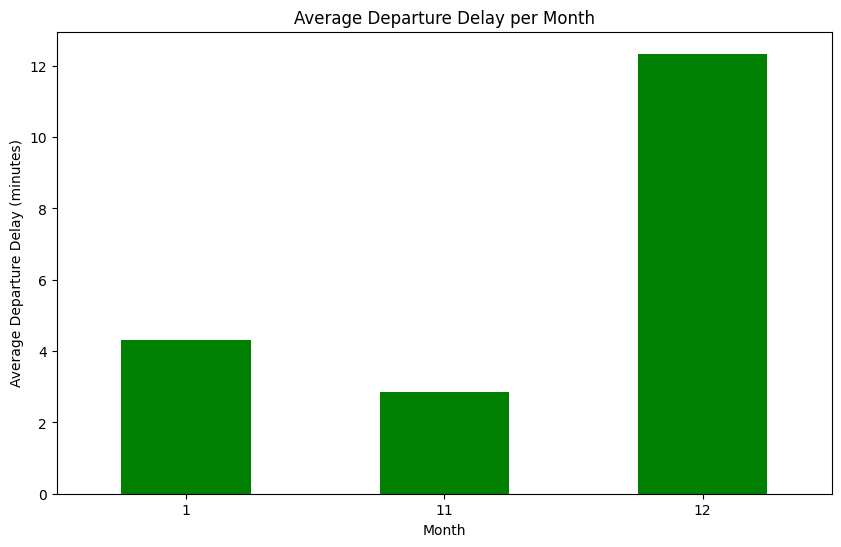

<Figure size 640x480 with 0 Axes>

In [37]:
# Grouping by month to get the average departure delay
monthly_delay = data.groupby('MONTH')['DEP_DELAY'].mean()

# Plotting a bar chart
plt.figure(figsize=(10,6))
monthly_delay.plot(kind='bar', color='green')
plt.title('Average Departure Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()

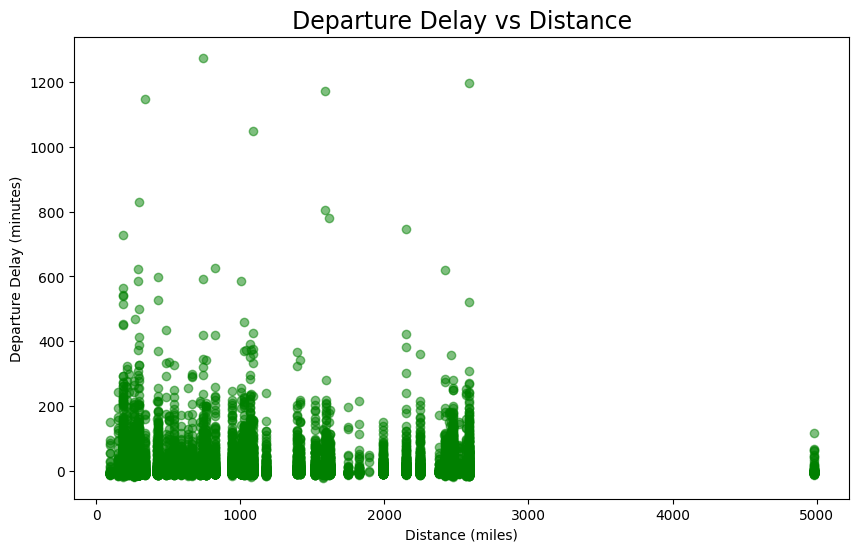

<Figure size 640x480 with 0 Axes>

In [38]:
# Scatter plot between departure delay and distance
plt.figure(figsize=(10,6))
plt.scatter(data['DISTANCE'], data['DEP_DELAY'], alpha=0.5, color='green')
plt.title('Departure Delay vs Distance', fontsize=17)
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.show()
plt.tight_layout()

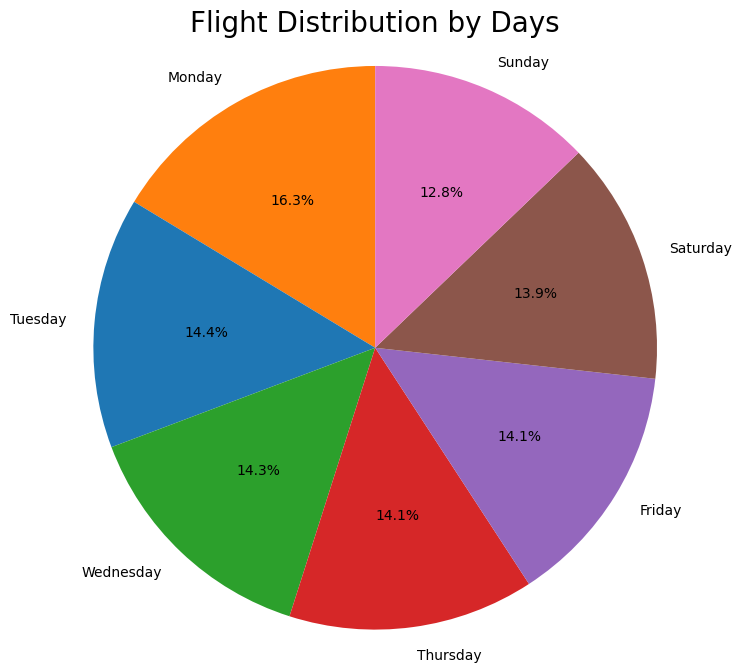

<Figure size 640x480 with 0 Axes>

In [39]:
# Assuming 'data' is your DataFrame and 'DAY_OF_WEEK' is the relevant column
day_of_week_counts = data['DAY_OF_WEEK'].value_counts()

# Define a new color palette
colors = ['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']

# Define the day labels
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the pie chart
plt.figure(figsize=(8,8))
day_of_week_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=days)
plt.title('Flight Distribution by Days',fontsize=20)
plt.ylabel('')  # No need to show y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
plt.tight_layout()

In [40]:
# Building a Model to make a prediction or suggestions to a user 

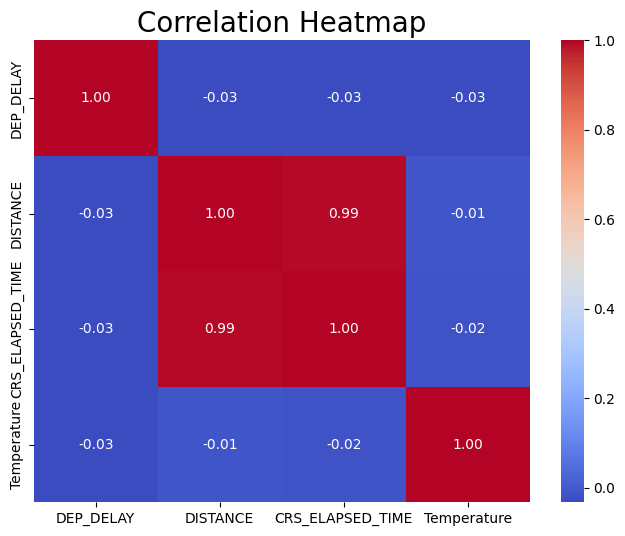

<Figure size 640x480 with 0 Axes>

In [41]:
"""  To see how different numerical columns (e.g., departure delay, distance, temperature) correlate with each other, use a heatmap:
This heatmap will help you see which variables are positively or negatively correlated."""

# Correlation matrix
corr = data[['DEP_DELAY', 'DISTANCE', 'CRS_ELAPSED_TIME', 'Temperature']].corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap',fontsize=20)
plt.show()
plt.tight_layout()

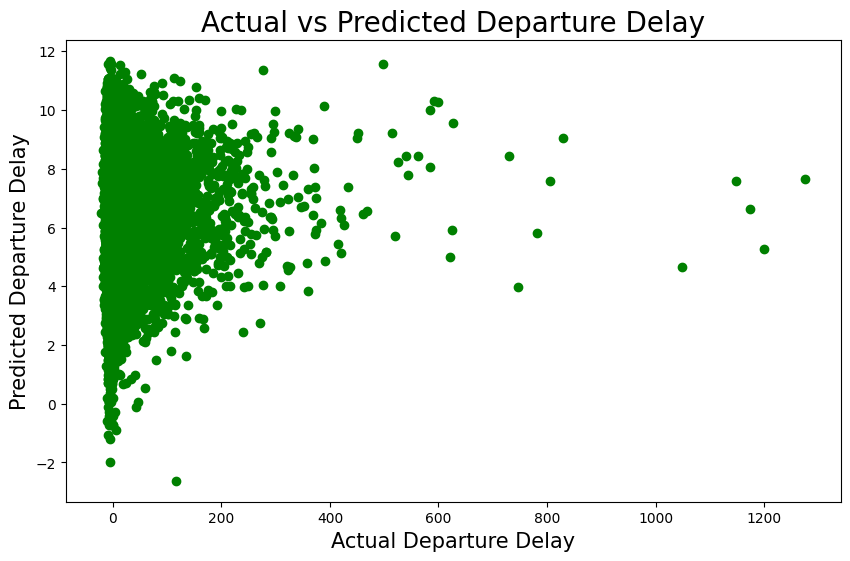

<Figure size 640x480 with 0 Axes>

In [42]:
# Selecting features and target variable
X = data[['DISTANCE', 'Temperature']]
y = data['DEP_DELAY']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predicting departure delay
predictions = model.predict(X)

# Plotting actual vs predicted departure delays
plt.figure(figsize=(10,6))
plt.scatter(y, predictions, color='green')
plt.title('Actual vs Predicted Departure Delay', fontsize=20)
plt.xlabel('Actual Departure Delay',fontsize=15)
plt.ylabel('Predicted Departure Delay', fontsize=15)
plt.show()
plt.tight_layout()


# plt.scatter(earthquake_data['depth'], earthquake_data['mag'], alpha=1.0, color='red')